In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import json

In [4]:
import requests

# Question 1 

# 1.1

In [5]:
Blockchain = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/657151")

In [6]:
MyBlock= json.loads(Blockchain.text)

In [7]:
print (MyBlock['txcount'])

20537


'Tx Count' counts the number of transactions that have taken place before this one on the Bitcoin blockchain. My transaction was the 20,537th transaction to occur on the chain.

In [8]:
import datetime

In [9]:
timestamp= datetime.datetime.fromtimestamp(MyBlock['time'])

In [10]:
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

2020-10-16 18:48:59


Time is simply the time that the transaction took place

In [11]:
print (MyBlock['totalFees'])

0.05484693000000007


'Total Fees' is the amount that it cost to facilitate this transaction, or it is the amount that is paid to the miners

In [12]:
print (MyBlock['confirmations'])

11082


'Confirmations' is the number of times that another block is placed after this one on the Bitcoin Blockchain

In [13]:
print (MyBlock['miner'])

taal.com


'Miner' is simply the name of the miner or mining pool that mined the block

# 1.2 Famous Blocks

# Hal Finney Block

In [14]:
Blockchain1 = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/170")

In [15]:
HalFinneyBlock= json.loads(Blockchain1.text)

In [16]:
HalFinneyTime= datetime.datetime.fromtimestamp(HalFinneyBlock['time'])

In [17]:
print(HalFinneyTime.strftime('%Y-%m-%d %H:%M:%S'))

2009-01-12 03:30:25


# Pizza Block

In [18]:
Blockchain2 = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/57043")

In [19]:
PizzaBlock= json.loads(Blockchain2.text)

In [20]:
PizzaBlockTime= datetime.datetime.fromtimestamp(PizzaBlock['time'])

In [21]:
print(PizzaBlockTime.strftime('%Y-%m-%d %H:%M:%S'))

2010-05-22 19:16:31


# Question 2

# Time series investigation of Bitcoin Price

# 2.1

In [22]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [23]:
from fredapi import Fred

In [24]:
fred= Fred(api_key='04cd69bf4695c14ac7bce72969b5ae96')

In [25]:
BitcoinPrice = fred.get_series('CBBTCUSD')

In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib as mplt

<AxesSubplot:>

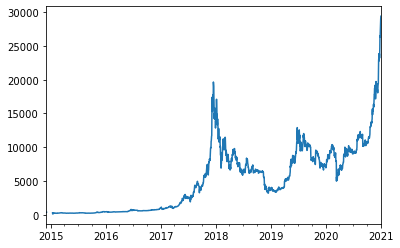

In [28]:
BitcoinPrice.plot()

In [29]:
GoldPrice = fred.get_series('ID7108')

<AxesSubplot:>

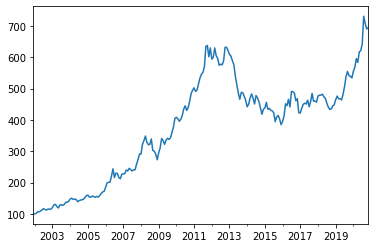

In [30]:
GoldPrice.plot()

In [31]:
SP500Market = fred.get_series('SP500')

<AxesSubplot:>

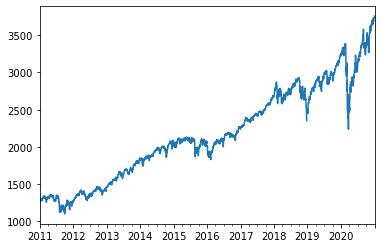

In [32]:
SP500Market.plot()

In [33]:
rfrate = fred.get_series('TB3MS')

<AxesSubplot:>

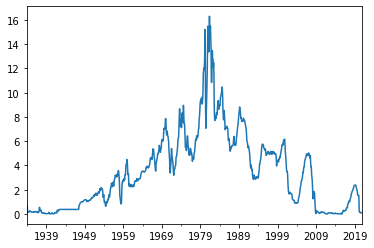

In [34]:
rfrate.plot()

# 2.2

# Data Transformations

In [235]:
df= pd.concat([BitcoinPrice,GoldPrice,SP500Market,rfrate],axis=1)

In [236]:
df

,0,1,2,3
1934-01-01,NaN,NaN,NaN,0.72
1934-02-01,NaN,NaN,NaN,0.62
1934-03-01,NaN,NaN,NaN,0.24
1934-04-01,NaN,NaN,NaN,0.15
1934-05-01,NaN,NaN,NaN,0.16
...,...,...,...,...
2020-12-28,27044.14,NaN,3735.36,NaN
2020-12-29,27407.85,NaN,3727.04,NaN
2020-12-30,28934.56,NaN,3732.04,NaN
2020-12-31,29026.97,NaN,3756.07,NaN


In [237]:
df.columns=('BitcoinPrice','GoldPrice','S&P500','RiskFreeRate')

In [238]:
df = df.fillna(method='ffill')

I'm going to extract data starting in 2015 then eliminate the first two rows such that we have effective analysis later on

In [239]:
df=df.loc['2015-11-01':'2020-12-01']

In [240]:
df= df[df.index.day==1]

In [241]:
df

,BitcoinPrice,GoldPrice,S&P500,RiskFreeRate
2015-11-01,329.46,402.6,2079.36,0.12
2015-12-01,362.68,384.7,2102.63,0.23
2016-01-01,435.66,395.0,2043.94,0.26
2016-02-01,371.33,412.4,1939.38,0.31
2016-03-01,433.08,451.2,1978.35,0.29
...,...,...,...,...
2020-08-01,11805.82,730.8,3271.12,0.10
2020-09-01,11911.74,707.7,3526.65,0.11
2020-10-01,10598.64,690.2,3380.80,0.10
2020-11-01,13784.52,694.6,3269.96,0.09


In [242]:
import numpy as np

In [243]:
df['BitcoinReturns']= np.log(df['BitcoinPrice']/df['BitcoinPrice'].shift(1))

In [244]:
df['GoldReturns']=np.log(df['GoldPrice']/df['GoldPrice'].shift(1))

In [245]:
df['S&PReturns']= np.log(df['S&P500']/df['S&P500'].shift(1))

In [246]:
df['RiskFreeReturns']=df['RiskFreeRate']/1200

Drop the first two rows such that we have analysis from the start of 2016 to near the end of 2020

In [247]:
df = df.drop(df.index[0])

In [248]:
df = df.drop(df.index[0])

In [249]:
df

,BitcoinPrice,GoldPrice,S&P500,RiskFreeRate,BitcoinReturns,GoldReturns,S&PReturns,RiskFreeReturns
2016-01-01,435.66,395.0,2043.94,0.26,0.183341,0.026422,-0.028310,0.000217
2016-02-01,371.33,412.4,1939.38,0.31,-0.159771,0.043108,-0.052511,0.000258
2016-03-01,433.08,451.2,1978.35,0.29,0.153831,0.089917,0.019895,0.000242
2016-04-01,417.68,445.4,2072.78,0.23,-0.036207,-0.012938,0.046628,0.000192
2016-05-01,456.98,465.7,2065.30,0.27,0.089924,0.044569,-0.003615,0.000225
2016-06-01,534.84,441.3,2099.33,0.27,0.157328,-0.053817,0.016343,0.000225
2016-07-01,678.19,490.7,2102.95,0.30,0.237460,0.106108,0.001723,0.000250
2016-08-01,605.20,490.1,2170.84,0.30,-0.113869,-0.001223,0.031773,0.000250
2016-09-01,573.02,484.6,2170.86,0.29,-0.054638,-0.011286,0.000009,0.000242
2016-10-01,615.65,461.2,2168.27,0.33,0.071758,-0.049492,-0.001194,0.000275


In [250]:
Rbt = df["BitcoinReturns"]

In [251]:
Rgt = df["GoldReturns"]

In [252]:
Rmt = df["S&PReturns"]

In [253]:
Rft = df["RiskFreeReturns"]

# 2.3 Data Analysis

# Correlation Analysis

In [254]:
BitoinandGoldCorr = Rbt.corr(Rgt)

In [255]:
BitoinandGoldCorr

0.232710105447172

This means that Bitcoin and Gold have a postive correlation, but a reasonably weak one. Meaning that if the price of Gold were to increase then so would the price of Bitcoin. The price rise however, wouldn't be as much as the price rise of Gold

In [256]:
BitcoinandMarketCorr = Rbt.corr(Rmt)

In [257]:
BitcoinandMarketCorr

0.19641653217765134

Similar to above, Bitcoin and the market have a positive correlation. Such that if the market was to experience and increase then as would Bitcoin. But given the value of 0.187 the correlation can be considered to be quite weak, such that market movements won't be mirrored in Bitcoin

The above values would suggest that the view that Bitcoin is a high risk high return asset is potentially more viable than the view of being an alternative asset to Gold. This is because if Gold is an alternative or a substitute for Bitcoin then you would expect to see a reasonably strong correlation betweeen the two, due to them theorectically performing the same function. With regards to the high risk high reward view new assset classes such as cryptocurrency that have a relatively low correlation with the market will tend to be considered to be high risk, i.e. you are taking a contrarian view of the market. On top of this Bitcoin's volatility as shown above in question 2.1 is considerable such that it will fit the high risk high return view. Given the large amounts of liquidity that is currently being pumped into global economies it is very unlikely that you would see a negative correlation between these asset classes.

# Regression Analysis

Regression analysis of Bitcoin compared to the market

In [258]:
y= Rbt- Rft

In [259]:
X = Rmt - Rft

In [260]:
from sklearn.linear_model import LinearRegression

In [261]:
lr = LinearRegression()

In [262]:
y = y.values.reshape(-1,1)

In [263]:
y.shape

(60, 1)

In [264]:
X = X.values.reshape(-1,1)

In [265]:
X.shape

(60, 1)

In [266]:
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

[0.05721664] [[0.9161962]]


The Alpha for Bitcoin is 0.0572 and the Beta is 0.916

Alpha in CAPM is the measure of excess returns compared to the benchmark index, which is the S&P500. An Alpha of 0.0572 sugggests that Bitcoin provides a return of 5.72% over the S&P500.

Beta captures the risk profile of an assest compared to the market, which in this case is the S&P500. A Beta of 0.916 suggests that if the market was to experience a price rise of 100% then Bitcoin would rise 91.6%, in so suggesting that Bitcoin is less risky than the market over the time period in which we have conducted our analysis

# Regression analysis of Gold compared to the market

In [267]:
Y2 = Rgt-Rft

In [268]:
Y2 = Y2.values.reshape(-1,1)

We can use the same X value as above

In [269]:
lr.fit(X, Y2)
print(lr.intercept_, lr.coef_)

[0.00891372] [[-0.00016823]]


The Alpha for Gold is 0.0089 and the Beta is -0.000168923

Alpha is as explained above the excess returns an asset experiences over and above the benchmark, which again in this case is the S&P500. A Alpha of 0.0089 suggests that Gold experiences excess returns over the S&P500 of 0.89%

Beta as also explained above is a measure of risk of an asset, in this case we have a Beta for Gold that is nearly zero. Zero Beta assets have no correlation with the market and will have a similar rate of return to the risk free rate. This intuitively makes sense when you consider that Gold is a safe haven asset and is typically a counter cyclical instrument.